In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Downloading data

In [3]:
#list of dataframes
dflist = []
#list of all seasons, we'll use them later
seasonst = []

for year in range(22,23,1):
    #create a string with season name
    if year<9:
        yeartext='0'+str(year)+'0'+str(year+1)
        yeartext2='0'+str(year)+'-0'+str(year+1)
    elif year==9:
        yeartext='0910'
        yeartext2='09-10'
    else:
        yeartext=str(year)+str(year+1)
        yeartext2=str(year)+'-'+str(year+1)
    #get data from webpage
    performance_year = pd.read_csv("https://www.football-data.co.uk/mmz4281/"+yeartext+"/E0.csv",delimiter=',')
    #append season name
    seasonst.append(yeartext2)
    #make list of dataframes
    dflist.append(performance_year)
#put dataframes into one big
performance = pd.concat(dflist).reset_index()

In [4]:
performance.columns

Index(['index', 'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=107)

# Preparing data

In [10]:
#top5 teams
teams = ['Man City', 'Arsenal', 'Man United', 'Newcastle', 'Liverpool']

#dictionary to store data
team_dfs = dict()
for team in teams:
    #empty dataframe
    team_df = pd.DataFrame(columns = ["Points", "Date", "Game"])
    #get matches by this team
    matches = performance.loc[(performance['AwayTeam'] == team) | (performance['HomeTeam'] == team)]
    #auxilliary variable that will be helpful to plot
    game = 0
    for i, match in matches.iterrows():
        game +=1
        #if team was away
        if match['AwayTeam'] == team:
            #get goals for both teams
            goalsfor = match['FTAG']
            goalsagainst = match['FTHG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'A':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
        else:
            #geat goals for both teams
            goalsfor = match['FTHG']
            goalsagainst = match['FTAG']
            #assign 3 points if win, 1 if draw, 0 if lost
            if match['FTR'] == 'H':
                points = 3
            elif match['FTR'] == 'D':
                points = 1
            else:
                points = 0
                #assign value to dataframe
        team_df.at[i, "Points"] = points
        team_df.at[i, "Game"] = game
    #calculate rolling average
    team_df['PointsRA'] = team_df['Points'].rolling(window=10, win_type='triang').mean()
    #append df
    team_dfs[team] = team_df

In [11]:
print(team_dfs)

{'Man City':     Points Date Game  PointsRA
9        3  NaN    1       NaN
13       3  NaN    2       NaN
28       1  NaN    3       NaN
35       3  NaN    4       NaN
46       3  NaN    5       NaN
57       1  NaN    6       NaN
62       3  NaN    7       NaN
74       3  NaN    8       NaN
79       3  NaN    9       NaN
96       0  NaN   10      2.38
108      3  NaN   11      2.34
116      3  NaN   12      2.38
127      3  NaN   13      2.38
136      0  NaN   14      2.28
155      3  NaN   15      2.24
161      1  NaN   16      2.24
175      3  NaN   17      2.16
178      0  NaN   18      2.02
188      3  NaN   19      1.94
196      3  NaN   20      1.92
208      0  NaN   21      1.86
218      3  NaN   22      1.82
220      3  NaN   23      1.90
226      1  NaN   24      2.00
236      3  NaN   25      2.00
241      3  NaN   26      2.08
256      3  NaN   27      2.24
270      3  NaN   28      2.34
293      3  NaN   29      2.46
302      3  NaN   30      2.66
320      3  NaN   31      

# Making plot

C:\Users\PC\AppData\Local\Temp\ipykernel_2512\2410874625.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels, minor=True)


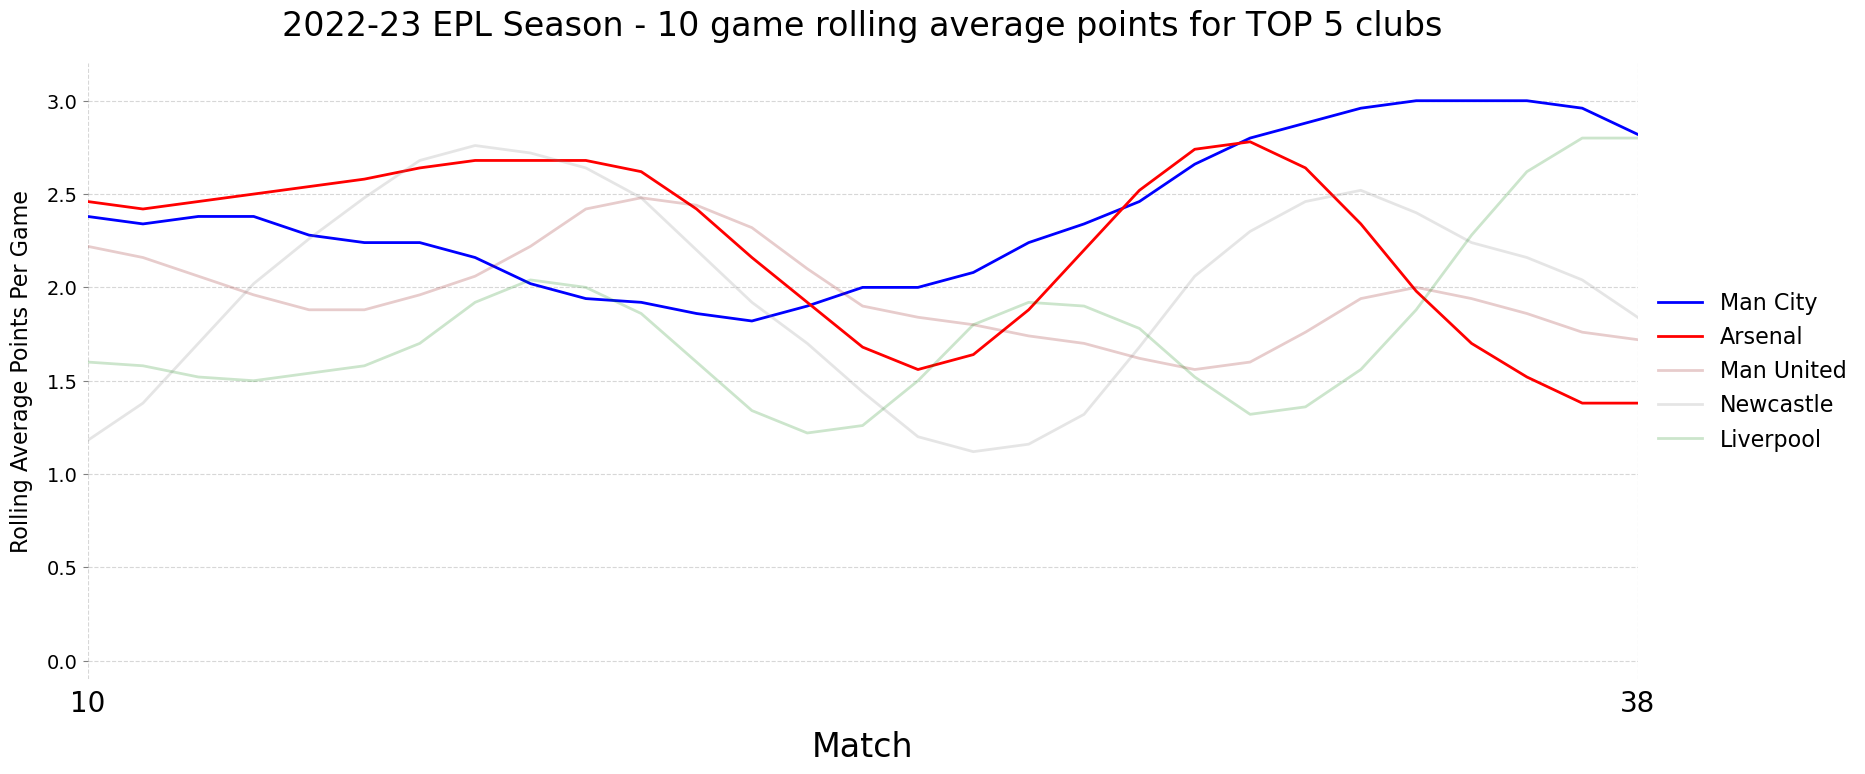

In [17]:
#create plot
fig, ax = plt.subplots(figsize=(20, 8))
#arsenal got yellow because of those 2004 kits, but it was invisible so they got green
colors = ['blue', 'red', 'darkred', 'grey', 'green']
#City and Arsenal highlighted more
alphas = [1, 1, 0.2, 0.2, 0.2, 0.2]

for club, color, alpha in zip(teams, colors, alphas):
    ax.plot(team_dfs[club]['Game'],  team_dfs[club]['PointsRA'], linewidth=2, linestyle='-', color=color, alpha=alpha, zorder=2, label=club)

#set title
ax.set_title("2022-23 EPL Season - 10 game rolling average points for TOP 5 clubs", fontsize=24, pad=20)

# Set x-axis ticks and labels
tick_locations = np.arange(10, max(team_dfs["Liverpool"]['Game']) + 1, 38)
tick_locations = np.append(tick_locations, max(team_dfs["Liverpool"]['Game']))  # Add the max value as a tick location
tick_labels = seasonst[:len(tick_locations)]
ax.set_xticks(tick_locations)
ax.set_xticklabels(tick_labels, minor=True)

#set axis limits
ax.set_xlim(10, max(team_dfs["Liverpool"]['Game']))
ax.set_ylim(-0.1, 3.2)

#disable black ticks, but big text xaxis
ax.tick_params(axis='x', color='white', which='both', labelsize=20)
#grey y ticks
ax.tick_params(axis='y', color='grey', labelsize=14)

#add grid
ax.grid(zorder=1, linestyle="--", alpha=0.5)

#disable spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#add axis labels
ax.set_ylabel('Rolling Average Points Per Game', fontsize=16, labelpad=10)
ax.set_xlabel('Match', fontsize=24, labelpad=10)

#make legend
plt.legend(bbox_to_anchor=(1.0, 0.5), loc="center left", fontsize=16, edgecolor='white')

#display the plot
plt.show()